<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-06-21 22:24:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100% 94.5K=0.2s

2021-06-21 22:24:17 (94.5 KB/s) - 'loan_train.csv' saved [23101/23101]



### Load Data From CSV File


In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

### Convert to date time object


In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [6]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

'conda' is not recognized as an internal or external command,
operable program or batch file.


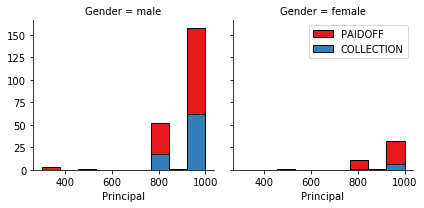

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

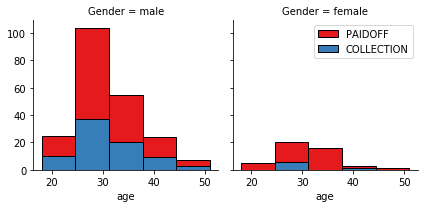

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 6)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

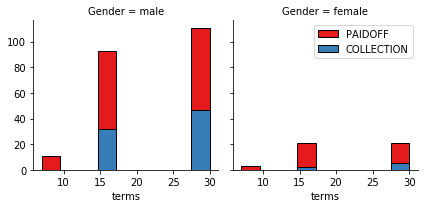

In [9]:
bins = np.linspace(df.terms.min(), df.terms.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'terms', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


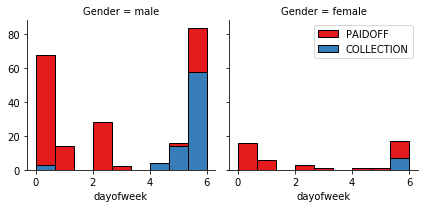

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


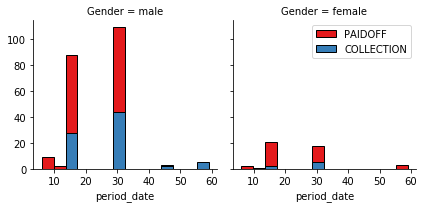

In [161]:
df['period_date'] = (df['due_date'] - df['effective_date']).astype('timedelta64[D]')
bins = np.linspace(df.period_date.min(), df.period_date.max(), 15)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'period_date', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [21]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [22]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [23]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, jaccard_score, f1_score, log_loss
from sklearn import preprocessing

def evaluate_KNN(X, y, df_result=False):
    js_list, f1_list = [], []
    k_list = list(range(2,11))

    for i in k_list:
        knn_model = KNeighborsClassifier(n_neighbors=i)
        knn_cv_js = cross_val_score(knn_model, X, le.transform(y), cv=5,scoring=make_scorer(jaccard_score, greater_is_better=True)
                                        )
        knn_cv_f1 = cross_val_score(knn_model, X, le.transform(y), cv=5,scoring=make_scorer(f1_score, greater_is_better=True)
                                        )
        js_list.append(knn_cv_js.mean())
        f1_list.append(knn_cv_f1.mean())

    print(f"Highest jaccard score = {max(js_list)} when k={k_list[js_list.index(max(js_list))]}")
    print(f"Highest f1 score = {max(f1_list)} when k={k_list[f1_list.index(max(f1_list))]}")

    if df_result is not False:
        df_result.loc[len(df_result)] = ["KNN", max(js_list), max(f1_list), np.nan]

    else:
        pass

    return k_list[js_list.index(max(js_list))], k_list[f1_list.index(max(f1_list))]

def train_KNN(X, y, k_list, df_result=False):
    js_knn_model = KNeighborsClassifier(n_neighbors=k_list[0])
    js_knn_model.fit(X, le.transform(y))

    js_ = jaccard_score(le.transform(y), js_knn_model.predict(X))

    print("Jaccard score =",js_)

    f1_knn_model = KNeighborsClassifier(n_neighbors=k_list[1])
    f1_knn_model.fit(X, le.transform(y))

    f1_ = f1_score(le.transform(y), f1_knn_model.predict(X))

    print("F1 score =",f1_)
    if df_result is not False:
        df_result.loc[len(df_result)] = ["KNN", js_, f1_, np.nan]
    
    else:
        pass

    return js_knn_model, f1_knn_model

# Decision Tree


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

DT_model = DecisionTreeClassifier(random_state=0)

def evaluate_model(X, y, model, model_name, df_result=False, logloss=False):
    print("-"*10 + f" {model_name} Cross Validate " + "-"*10)

    if model_name == "KNN":
        js_list, f1_list = [], []
        k_list = list(range(2,11))

        for i in k_list:
            model = KNeighborsClassifier(n_neighbors=i)

            cv_js = cross_val_score(model, X, y, cv=5,scoring=make_scorer(jaccard_score, greater_is_better=True)
                                    )
            cv_f1 = cross_val_score(model, X, y, cv=5,scoring=make_scorer(f1_score, greater_is_better=True)
                                    )

            js_list.append(cv_js.mean())
            f1_list.append(cv_f1.mean())

        js_ = max(js_list)
        f1_ = max(f1_list)

        print(f"Highest jaccard score = {js_} when k={k_list[js_list.index(js_)]}")
        print(f"Highest f1 score = {f1_} when k={k_list[f1_list.index(f1_)]}")

    else:
        cv_js = cross_val_score(model, X, y, cv=5, scoring=make_scorer(jaccard_score, greater_is_better=True)
                                )
        cv_f1 = cross_val_score(model, X, y, cv=5, scoring=make_scorer(f1_score, greater_is_better=True)
                                )

        js_ = cv_js.mean()
        f1_ = cv_f1.mean()

        print("Jaccard score =", js_)
        print("F1 score =", f1_)

    if logloss is not False:
        cv_ll = cross_val_score(model, X, y, cv=5, scoring=make_scorer(log_loss, greater_is_better=False)
                                ) * -1
        ll_ = cv_ll.mean()
        print("Log loss =", ll_)

    else:
        ll_ = np.nan

    if df_result is not False:
        df_result.loc[len(df_result)] = [model_name, js_, f1_, ll_]

    else:
        pass

    if model_name == "KNN":
        return k_list[js_list.index(js_)], k_list[f1_list.index(f1_)]
    
    else:

        return None, None

def model_session(X, y, model, model_name, train=True, df_result=False, logloss=False):
    
    if train:
        print("-"*10 + f" {model_name} Training " + "-"*10)
        model.fit(X, y)

    else:
        print("-"*10 + f" {model_name} Predicting " + "-"*10)

    js_ = jaccard_score(y, model.predict(X))
    f1_ = f1_score(y, model.predict(X))

    print("Jaccard score =", js_)
    print("F1 score =", f1_)

    if logloss is not False:
        ll_ = log_loss(y, model.predict(X))
        print("Log loss =", ll_)

    else:
        ll_ = np.nan

    if df_result is not False:
        df_result.loc[len(df_result)] = [model_name, js_, f1_, ll_]

    else:
        pass

    return model

# Support Vector Machine


In [245]:
from sklearn.svm import SVC

def evaluate_SVC(X, y):
    print("-"*10 + " SVC Cross Validate " + "-"*10)
    js_list, f1_list = [], []

    svm_model = SVC(degree=4, gamma='auto')

    svm_cv_js = cross_val_score(svm_model, X, le.transform(y), cv=5,scoring=make_scorer(jaccard_score, greater_is_better=True)
                                    )
    svm_cv_f1 = cross_val_score(svm_model, X, le.transform(y), cv=5,scoring=make_scorer(f1_score, greater_is_better=True)
                                    )
    js_list.append(svm_cv_js.mean())
    f1_list.append(svm_cv_f1.mean())

    print(f"Highest jaccard score = {max(js_list)}")
    print(f"Highest f1 score = {max(f1_list)}")

def train_SVC(X, y, df_result):
    print("-"*10 + " SVC Training " + "-"*10)
    svm_model = SVC(degree=4, gamma='auto')
    svm_model.fit(X, le.transform(y))

    js_ = jaccard_score(le.transform(y), svm_model.predict(X))

    f1_ = f1_score(le.transform(y), svm_model.predict(X))

    df_result.loc[len(df_result)] = ["SVM", js_, f1_, np.nan]

    return svm_model, df_result

# Logistic Regression


In [42]:
from sklearn.linear_model import LogisticRegression

def evaluate_LR(X, y):
    print("-"*10 + " Logistic Regression Cross Validate " + "-"*10)

    LR_model = LogisticRegression(max_iter=1000)

    LR_cv_js = cross_val_score(LR_model, X, y, cv=5,scoring=make_scorer(jaccard_score, greater_is_better=True)
                                    )
    LR_cv_f1 = cross_val_score(LR_model, X, y, cv=5,scoring=make_scorer(f1_score, greater_is_better=True)
                                    )
    LR_cv_ll = cross_val_score(LR_model, X, y, cv=5,scoring=make_scorer(log_loss, greater_is_better=False)
                                    ) * -1

    print("Jaccard score =", LR_cv_js.mean())
    print("F1 score =", LR_cv_f1.mean())
    print("Log loss=", LR_cv_ll.mean())

def train_LR(X, y, df_result):
    print("-"*10 + " Logistic Regression Training " + "-"*10)
    LR_model = LogisticRegression(max_iter=1000)
    LR_model.fit(X, le.transform(y))

    js_ = jaccard_score(le.transform(y), LR_model.predict(X))

    f1_ = f1_score(le.transform(y), LR_model.predict(X))

    ll_ = log_loss(le.transform(y), LR_model.predict(X))

    df_result.loc[len(df_result)] = ["LogisticRegression", js_, f1_, ll_]

    return LR_model, df_result

In [132]:
def Statistic(csv_path, statistic_features, target='loan_status'):
    # Load fresh data
    df_st = pd.read_csv(csv_path)
    df_st = df_st.iloc[:,2:]
    # Apply a few simple preprocess

    # Bin Principal feature
    bin_principal = np.linspace(min(df_st.Principal), max(df_st.Principal), 5)
    df_st['Principal'] = pd.cut(df_st.Principal, bin_principal, labels=False, include_lowest=True)

    df_st['education'].replace(to_replace="Bechalor", value="college", inplace=True)

    df_st['due_date'] = pd.to_datetime(df_st['due_date'])
    df_st['effective_date'] = pd.to_datetime(df_st['effective_date'])
    df_st['dayofweek'] = df_st['effective_date'].dt.dayofweek
    df_st['weekend'] = df_st['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
    df_st['period_date'] = (df_st['due_date'] - df_st['effective_date']).astype('timedelta64[D]')

    bins = np.linspace(df_st.age.min(), df_st.age.max(), 4)
    df_st['age_binned'] = pd.cut(df_st['age'], bins, labels=False, include_lowest=True)
    
    for feature in statistic_features:
        print(pd.concat([df_st.groupby([feature])[target].value_counts(normalize=True),df_st.groupby([feature])[target].value_counts()], axis=1))
        print("-"*20)

    return df_st

list_Features = ['Principal','terms','Gender', "education", "dayofweek",'weekend','period_date','age_binned']
df_st = Statistic(csv_path='loan_train.csv' ,statistic_features=list_Features, target='loan_status')

loan_status  loan_status
Principal loan_status                          
0         PAIDOFF         1.000000            3
1         PAIDOFF         1.000000            2
2         PAIDOFF         0.777778           63
          COLLECTION      0.222222           18
3         PAIDOFF         0.738462          192
          COLLECTION      0.261538           68
--------------------
                   loan_status  loan_status
terms loan_status                          
7     PAIDOFF         1.000000           14
15    PAIDOFF         0.770270          114
      COLLECTION      0.229730           34
30    PAIDOFF         0.717391          132
      COLLECTION      0.282609           52
--------------------
                    loan_status  loan_status
Gender loan_status                          
female PAIDOFF         0.865385           45
       COLLECTION      0.134615            7
male   PAIDOFF         0.731293          215
       COLLECTION      0.268707           79
-------------------

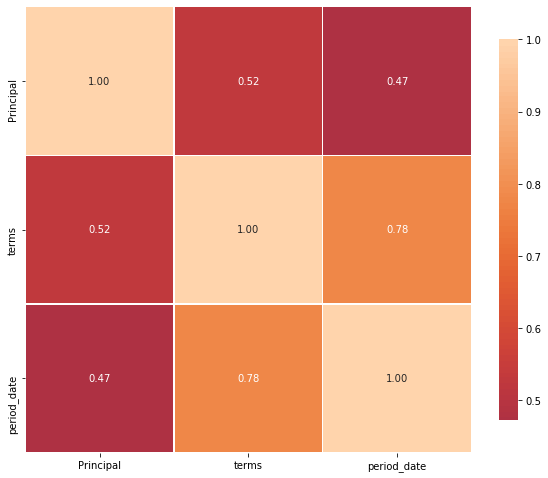

In [133]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
# ,'Gender','weekend', 'age_binned'
def Feature_engineering(df, feature_list=['Principal','terms','period_date']):
    # Make a copy version to avoid
    data_frame = df.copy()
    data_frame['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

    # Choose which feature will be use
    Feature = data_frame[feature_list]

    # one-hot encoding 'education' feature
    # education_le = preprocessing.LabelEncoder()
    # education_le.fit(["High School or Below", "college", "Master or Above"])
    # Feature['education'] = education_le.transform(Feature['education'])
    # Feature = pd.concat([Feature,pd.get_dummies(data_frame['education'])], axis=1)

    # Drop 'Master or Above' columns, cause the is only 2 sample of it
    # Feature.drop(['Master or Above'], axis = 1,inplace=True)
    
    correlations = Feature.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()

    X = Feature
    X = preprocessing.StandardScaler().fit(X).transform(X)
    y = data_frame['loan_status'].values

    le = preprocessing.LabelEncoder()
    le.fit(np.unique(y, return_inverse=False))
    y = le.transform(y)

    return X, y

X, y = Feature_engineering(df_st)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score, f1_score, log_loss, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score

def evaluate_models(X_train, y_train, X_test=None, y_test=None, cross_evaluate=True, testing=False):
    """
    Algorithm	Jaccard	F1-score	LogLoss
    """
    df_result = pd.DataFrame(columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])

    models_name = [
        "KNN",
        "Decision Tree",
        "SVM",
        "LogisticRegression"
    ]
    model_list= [
        KNeighborsClassifier(n_neighbors=7),
        DecisionTreeClassifier(random_state=0),
        SVC(degree=4, gamma='auto'),
        LogisticRegression(max_iter=1000)
    ]
    if cross_evaluate:
        """
        (X, y, model, model_name, df_result=False, logloss=False)
        """
        for i, model_name in enumerate(models_name):
            if model_name == "KNN":
                k_js, k_f1 = evaluate_model(X_train, y_train, model_list[i], model_name,df_result,True if i==len(models_name)-1 else False)
            else:
                evaluate_model(X_train, y_train, model_list[i], model_name,df_result,True if i==len(models_name)-1 else False)

            print("-"*50)
    
    else:
        """
        (X, y, model, model_name, train=True, df_result=False, logloss=False)
        """
        # Train model
        for i, model_name in enumerate(models_name):
            model_list[i] = model_session(X_train, y_train, model_list[i], model_name, train=True, df_result= df_result if testing == False else False, logloss=True if i==len(models_name)-1 else False)
            
            if testing:
                model_session(X_test, y_test, model_list[i], model_name, train=False, df_result=df_result, logloss=True if i==len(models_name)-1 else False)

            else:
                pass

            print("-"*50)

    return df_result

In [134]:
evaluate_models(X, y, cross_evaluate=True)

---------- KNN Cross Validate ----------
Highest jaccard score = 0.7514699792960663 when k=7
Highest f1 score = 0.8580951090638125 when k=7
--------------------------------------------------
---------- Decision Tree Cross Validate ----------
Jaccard score = 0.727536231884058
F1 score = 0.8421050854640993
--------------------------------------------------
---------- SVM Cross Validate ----------
Jaccard score = 0.7514699792960663
F1 score = 0.8580951090638125
--------------------------------------------------
---------- LogisticRegression Cross Validate ----------
Jaccard score = 0.7456728778467909
F1 score = 0.8542615095082878
Log loss = 8.78434632717671
--------------------------------------------------


,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.751470,0.858095,NaN
1,Decision Tree,0.727536,0.842105,NaN
2,SVM,0.751470,0.858095,NaN
3,LogisticRegression,0.745673,0.854262,8.784346


# Model Evaluation using Test set


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [34]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-06-22 10:21:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

     0K ...                                                   100% 3.77G=0s

2021-06-22 10:21:06 (3.77 GB/s) - 'loan_test.csv' saved [3642/3642]



### Load Test set for evaluation


In [40]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


loan_status  loan_status
Principal loan_status                          
0         PAIDOFF         1.000000            3
2         PAIDOFF         0.583333            7
          COLLECTION      0.416667            5
3         PAIDOFF         0.769231           30
          COLLECTION      0.230769            9
--------------------
                   loan_status  loan_status
terms loan_status                          
7     PAIDOFF             1.00            6
15    PAIDOFF             0.65           13
      COLLECTION          0.35            7
30    PAIDOFF             0.75           21
      COLLECTION          0.25            7
--------------------
                    loan_status  loan_status
Gender loan_status                          
female PAIDOFF         0.727273            8
       COLLECTION      0.272727            3
male   PAIDOFF         0.744186           32
       COLLECTION      0.255814           11
--------------------
                                  loan_status 

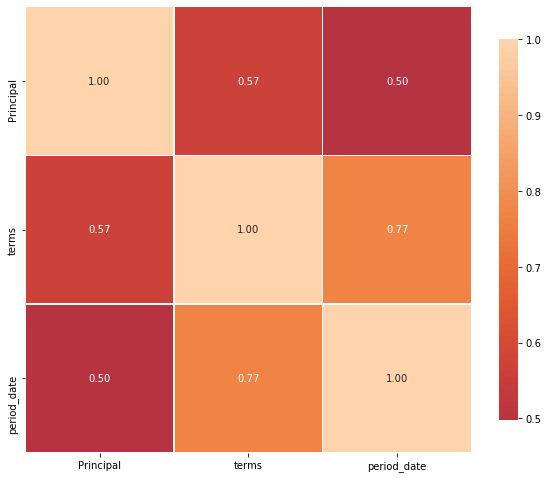

In [135]:
df_st_test = Statistic('loan_test.csv',statistic_features=list_Features)

X_test, y_test = Feature_engineering(df_st_test)

In [136]:
evaluate_models(X, y, X_test, y_test, cross_evaluate=False, testing=True)

---------- KNN Training ----------
Jaccard score = 0.7419354838709677
F1 score = 0.8518518518518519
---------- KNN Predicting ----------
Jaccard score = 0.6851851851851852
F1 score = 0.8131868131868133
--------------------------------------------------
---------- Decision Tree Training ----------
Jaccard score = 0.7536231884057971
F1 score = 0.859504132231405
---------- Decision Tree Predicting ----------
Jaccard score = 0.7407407407407407
F1 score = 0.851063829787234
--------------------------------------------------
---------- SVM Training ----------
Jaccard score = 0.7514450867052023
F1 score = 0.858085808580858
---------- SVM Predicting ----------
Jaccard score = 0.7407407407407407
F1 score = 0.851063829787234
--------------------------------------------------
---------- LogisticRegression Training ----------
Jaccard score = 0.7514450867052023
F1 score = 0.858085808580858
Log loss = 8.584981316015362
---------- LogisticRegression Predicting ----------
Jaccard score = 0.740740740740

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.685185,0.813187,NaN
1,Decision Tree,0.740741,0.851064,NaN
2,SVM,0.740741,0.851064,NaN
3,LogisticRegression,0.740741,0.851064,8.954705


In [79]:
test_result.reset_index(drop=True, inplace=True)
test_result

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.703704,0.826087,NaN
1,Decision Tree,0.740741,0.851064,NaN
2,SVM,0.740741,0.851064,NaN
3,LogisticRegression,0.740741,0.851064,8.954705


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
|---|---|---|---|
| 2020-10-27 | 2.1 | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27 | 2.0 | Malika Singla | Added lab to GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
